NOMBRE:

        Mauricio Casanova
      



Suponemos que el conjunto de datos se genera a partir de diferentes distribuciones multivariantes gaussianas.

In [ ]:
### Plots
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from sklearn.cluster import KMeans
bounds = np.linspace(-1, 3, 10)
normcolor = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
##########
from scipy.stats import multivariate_normal as mvnorm
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

Primero fijamos los valores medios y las matrices de covarianza correspondientes a cada clase, así como sus etiquetas. Actualmente se seleccionan tres valores medios para el conjunto de datos.

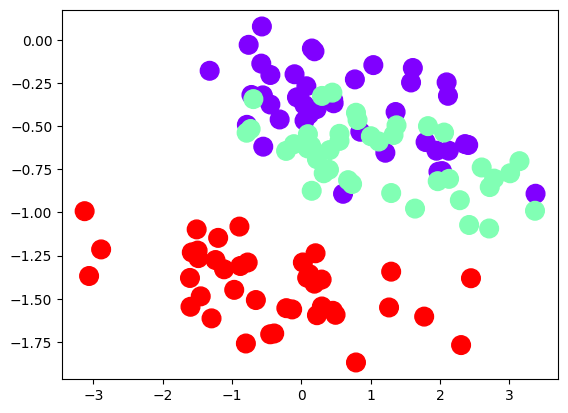

In [ ]:
# Ambient dimension
p=2
# Number of elements in each class
n1=40
n2=40
n3=40
#### Labels
color=np.concatenate((0*np.ones(n1,),1*np.ones(n2,),2*np.ones(n3,)),
                     axis=0)[np.newaxis]
#### Mean values
# Either random
m1=norm.rvs(0,1,size=(p,))
m2=norm.rvs(0,1,size=(p,))
m3=norm.rvs(0,1,size=(p,))
# Or fixed
#m1= [1,2]
#m2=[-2,-1]
#m3=[-2,3]
#### Covariance matrix
temp= norm.rvs(0, 0.5, size=(p, p))
Sigma1 =  temp.T@temp
Sigma2 = Sigma1
Sigma3 = Sigma1
#### Generate data
X1=mvnorm.rvs(m1, Sigma1, size=(n1, 1))
X2=mvnorm.rvs(m2, Sigma2, size=(n2, 1))
X3=mvnorm.rvs(m3, Sigma3, size=(n3, 1))
#### Build the dataset
X=np.concatenate((X1,X2,X3),axis=0)
Xlabeled=np.concatenate((X,color.T),axis=1)
xbar1=np.mean(X1,0)
xbar2=np.mean(X2,0)
xbar3=np.mean(X3,0)
xmean1=(xbar1+xbar2)/2
xmean2=(xbar1+xbar3)/2
xmean3=(xbar2+xbar3)/2
## Plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
plt.show()

Ahora los datos están listos para su procesamiento posterior.

Primero preparamos el conjunto de datos.

In [ ]:
X12=np.concatenate((X1,X2),axis=0)
y12=np.concatenate((0*np.ones(n1,),1*np.ones(n2,)),axis=0)[np.newaxis]

Antes de continuar, Use la siguiente matriz $\mathbf E_n$ para simplificar todo el proceso.

In [ ]:
#### Centering Matrix
def centering(n):
    return np.eye(n)-np.ones((n,n))/n

## K-Means

1.	Reanalice su datos y obtenga 2 y 3 cluster.
2.	Concluya lo obtenido y grafique lo pedido en 1.

In [ ]:
# K-Means con 2 clusters
kmeans2 = KMeans(n_clusters=2).fit(X12)
labels2 = kmeans2.labels_
labels2

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int32)

In [ ]:
# K-Means con 3 clusters
kmeans3 = KMeans(n_clusters=3,).fit(X12)
labels3 = kmeans3.labels_
labels3

array([1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1], dtype=int32)

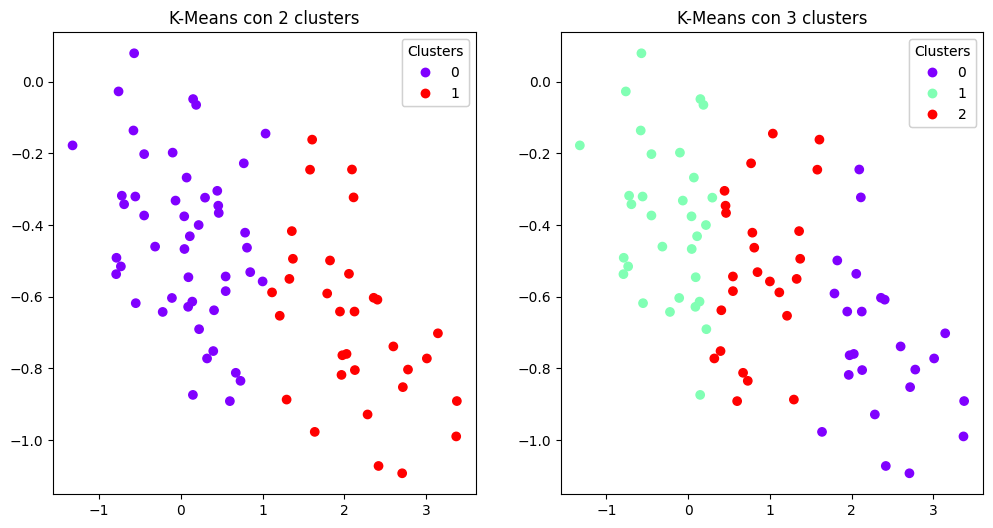

In [ ]:
# Plot con 2 clusters
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
scatter1 = ax[0].scatter(X12[:,0], X12[:,1], c=labels2, cmap=plt.cm.rainbow)
legend1 = ax[0].legend(*scatter1.legend_elements(),
                    loc="upper right", title="Clusters")
ax[0].add_artist(legend1)
ax[0].set_title("K-Means con 2 clusters")

# Plot con 3 clusters
scatter2 = ax[1].scatter(X12[:,0], X12[:,1], c=labels3, cmap=plt.cm.rainbow)
legend2 = ax[1].legend(*scatter2.legend_elements(),
                    loc="upper right", title="Clusters")
ax[1].add_artist(legend2)
ax[1].set_title("K-Means con 3 clusters")

plt.show()

In [ ]:
# El valor más bajo de SSE
print("El valor más bajo de SSE para dos cluster: ",kmeans2.inertia_)
print("")
# Ubicaciones finales del centroide
print("Ubicaciones finales del centroide para dos cluster",kmeans2.cluster_centers_)
print("")
# El número de iteraciones necesarias para converger
print("El número de iteraciones necesarias para converger para dos cluster",kmeans2.n_iter_)

El valor más bajo de SSE para dos cluster:  30.986940455004742

Ubicaciones finales del centroide para dos cluster [[ 0.06040987 -0.44059308]
 [ 2.11608661 -0.6768018 ]]

El número de iteraciones necesarias para converger para dos cluster 5


In [ ]:
# El valor más bajo de SSE
print("El valor más bajo de SSE para tres cluster: ",kmeans3.inertia_)
print("")
# Ubicaciones finales del centroide
print("Ubicaciones finales del centroide para tres cluster:",kmeans3.cluster_centers_)
print("")
# El número de iteraciones necesarias para converger
print("El número de iteraciones necesarias para converger para tres cluster",kmeans3.n_iter_)

El valor más bajo de SSE para tres cluster:  18.303010009509595

Ubicaciones finales del centroide para tres cluster: [[ 2.36875284 -0.73579108]
 [-0.25640549 -0.38560923]
 [ 0.8685179  -0.52773013]]

El número de iteraciones necesarias para converger para tres cluster 4


Podemos concluir que el error es mucho mayor en el de dos clusters dado que su centroide son solo dos, en el caso que nos dio es de aproximandamente el doble entre el de dos cluster y el de tres. Ahora como estan estandarizamos los datos estos convergen con $5$ y $4$ iteraciones en los cluster dos y tres respectivamente